<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height:300px">
    <div style="margin: 5px; padding: 10px;">
    <h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h5 style="color:#C0C0C0">LMU, 07 August 2019</h5>
    <h4 style="color:rgba(0,0,0,0.6)">Sebastian Anger, Taufiqurrahman, Tobias Megies, Alice Gabriel</h4>
    </div>
    <div style="float:right; margin: 20px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 100px">
        <div style="position:relative; top:40%; transform: translateY(-50%)">
        <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">P06 - Convolution solution</div>
        </div>
    </div>
</div>

**Please, do not forget to execute the Cell 1 first!**

In [1]:
# Cell 1: Preparation for programming
%matplotlib inline
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 3

<br />
<br />

## Markdown

In this notebook you are explicitly asked to work with markdown cells. This is an exercise in prepartion for the endterm report, which exclusively will be done in a notebook. 

With markdown cells you are able to include paragraphs of text within a notebook. Markdown is a "lightweight markup language with plain text formatting syntax designed so that it can be converted to HTML" (Wikipedia). To get informed on it, you can check out the wikipedia webpage. The second link provides you with a quick overview how to use markdown effectively. Acutally, you can use markdown cells by just typing your plain text but to make your text "look nice" these two links may help.

[Markdown @ Wikipedia](https://en.wikipedia.org/wiki/Markdown)

[Mardown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

To add a markdown cell to a notebook, just use the `plus` sign for adding another cell. Then, change it from `Code` into `Markdown` by selecting this option from the drop-down menu on top of the page.

<br />
<br />

### Exercise 1: Convolution with a boxcar function

This exercise is dedicated to understand the principle of convolution. Here, we will convolve a signal with a boxcar function in two different ways and compare the results.

a) Try to understand the code in Cell 2 and 3. Execute the cells.

b) Try to understand the code in Cell 4a and 4b. Execute the cells. What to do you observe concerning the time needed for calculation? What do you observe concerning the number of samples of the original and convolved functions? Try to explain your observations, use a markdown cell to write down your observations.

c) Use the Cells 5a and 5b to perform the convolution of the cosine with the boxcar. Compare the results of the two convolved signals and try to explain your observation. Hint: Remember what you learned last lesson. Again, use a markdown cell to write down your observations.

In [2]:
# Cell 2: Defining a function for discrete convolution
# mainly i.e.: flip, shift, multiply and sum
def conv(x, y):
    """Calculates the discrete convolution of two signals x and y.
    
    In
    ----------
    x : first signal, the "measurement" (array of floats)
    y : second signal, the convolution function, sometimes called kernel (array of float)

    Out
    -------
    c : convolution (array of floats)
    """
    m = len(x)
    n = len(y)
    c = np.zeros(m+n-1)              # initally, setting all convolution values to zero
    
    for i in range(0, m):             # Try: set this to be ranging to m+n-1
        for j in range(0, n):         # Try: set this to be ranging to max(m,n)
            c[i] += x[i-j] * y[j]
            
    return c

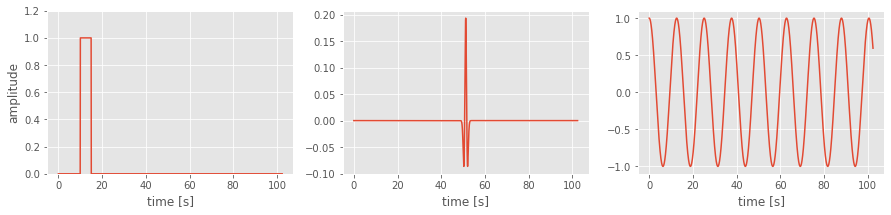

In [3]:
# Cell 3: Defining the boxcar + two different functions

npts = 4096                             # number of samples, initial value: 4096
dt = 0.025                                # sample rate, initial value:0.025 
# What is the maximum frequency of the data?   1/0.025s = 40 Hz

t = np.linspace(0,npts*dt,npts)

# boxcar
box = np.zeros(npts)
for i in range(400,600):
    box[i] = 1.

# Rieker wavelet
rk = signal.ricker(npts, 20.0)         # 2nd number = width of wavelet, intial value: 20.0 

# cosine 
cosine = np.cos(t/2)
    
# plot all functions
plt.rcParams["figure.figsize"] = (15, 3)

plt.subplot(131)
plt.plot(t, box)
plt.ylim(0,1.2)
#plt.xlim(0,100)
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(132)
plt.plot(t, rk)
#plt.xlim(0,100)
plt.xlabel('time [s]')

plt.subplot(133)
plt.plot(t, cosine)
plt.xlabel('time [s]')

plt.show()


In [4]:
# Cell 4a: Determine the convolution of the Rieker wavelet with the boxcar

# measures time since 01.01.1970 in seconds
tick1 = time() 
# calculate convolution with function of Cell 2
c1 = conv(rk, box)
tick2 = time()                     

# calculate convolution with numpy function
tick3 = time()
c2 = np.convolve(rk, box)
tick4 = time()

#taking first time difference and give it in seconds
delta=tick2 - tick1
hours=int( delta/3600. )
minit=int((delta-hours*3600.)/60. )
secon=int( delta-hours*3600.-minit*60. )
print("1st run:", secon, "s needed for calculation")
#taking secondt time difference and give it in seconds
delta=tick4 - tick3
hours=int( delta/3600. )
minit=int((delta-hours*3600.)/60. )
secon=int( delta-hours*3600.-minit*60. )
print("2nd run:", secon, "s needed for calculation")


1st run: 14 s needed for calculation
2nd run: 0 s needed for calculation


The professionally implemented convolution function from the numpy package performs the convolution using FFT. Thus, it is much faster than the primitively implemented equation of the discrete convolution. Especially for large data (including a high number of samples), this is very important.

number of samples of new signal: 8191


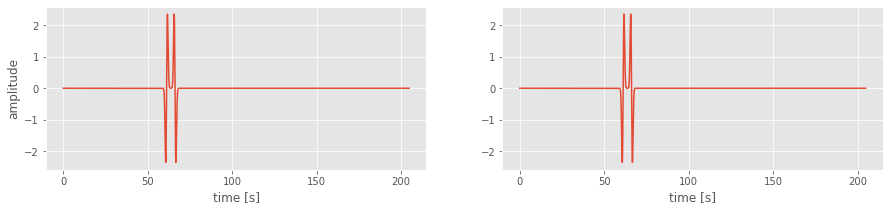

In [5]:
# Cell 4b: plot convolutions

# preparation for plotting
print('number of samples of new signal:', len(c1))
npts2 = len(c1)
t2 = np.linspace(0,npts2*dt,npts2)

# plotting
plt.subplot(121)
plt.plot(t2, c1)
#plt.xlim(0,130)
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(122)
plt.plot(t2, c2)
#plt.xlim(0,130)
plt.xlabel('time [s]')

plt.show()

Having a look on the equation for the discrete convolution, we see that the convolved signal has `m+n-1` samples, where `m` and `n` are the number of samples of the two original functions, respectively.

In [6]:
# Cell 5a: Determine the convolution of cosine with the boxcar

# measures time since 01.01.1970 in seconds
tick1 = time() 
# calculate convolution with function of Cell 2
c1 = conv(cosine, box)
tick2 = time()                     

# calculate convolution with numpy function
tick3 = time()
c2 = np.convolve(cosine, box)
tick4 = time()

#taking first time difference and give it in seconds
delta=tick2 - tick1
hours=int( delta/3600. )
minit=int((delta-hours*3600.)/60. )
secon=int( delta-hours*3600.-minit*60. )
print("1st run:", secon, "s needed for calculation")
#taking secondt time difference and give it in seconds
delta=tick4 - tick3
hours=int( delta/3600. )
minit=int((delta-hours*3600.)/60. )
secon=int( delta-hours*3600.-minit*60. )
print("2nd run:", secon, "s needed for calculation")


1st run: 15 s needed for calculation
2nd run: 0 s needed for calculation


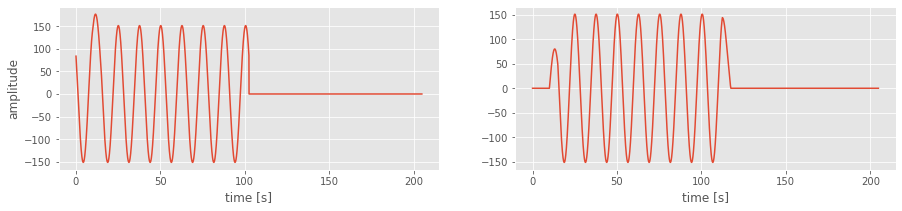

In [7]:
# Cell 5b: plot convolutions
# preparation for plotting
npts2 = len(c1)
t2 = np.linspace(0,npts2*dt,npts2)

# plotting
plt.subplot(121)
plt.plot(t2, c1)
#plt.xlim(0,130)
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(122)
plt.plot(t2, c2)
#plt.xlim(0,130)
plt.xlabel('time [s]')

plt.show()

Why do the two convolved functions look different? 

The professionall implemented convolution function of the numpy package includes tapering of the function before convolution. The self-coded discrete convolution function of Cell 2 does not. Because the first and last sample of the cosine function from Cell 3 have different amplitudes, we obtain a wrong result, if we do not consider tapering.

<br />
<br />
<br />

### Exercise 2: Convolution of noisy data

This exercise will show you what can happen when you convolve/filter noisy data and do not take care for the noise.
Be aware of the trade off between stabilizing the deconvolution and degrading accuracy of deconvolution!

a) Try to understand the code in Cell 6 and 7, and execute them. Compare the convolved signals in time and frequency domain. Describe what you see and the reason for it in a markdown cell.

b) Try to understand the code of Cell 8 and execute it. Describe and explain the outcome in a markdown cell.

c) Play around with the water-level applied during deconvolution (line 7 in Cell 8): change it in steps to higher values. What happens? Try to explain.

<ipython-input-8-4363ef2580b0>:59: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,3)
<ipython-input-8-4363ef2580b0>:66: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,3)
<ipython-input-8-4363ef2580b0>:73: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,5)


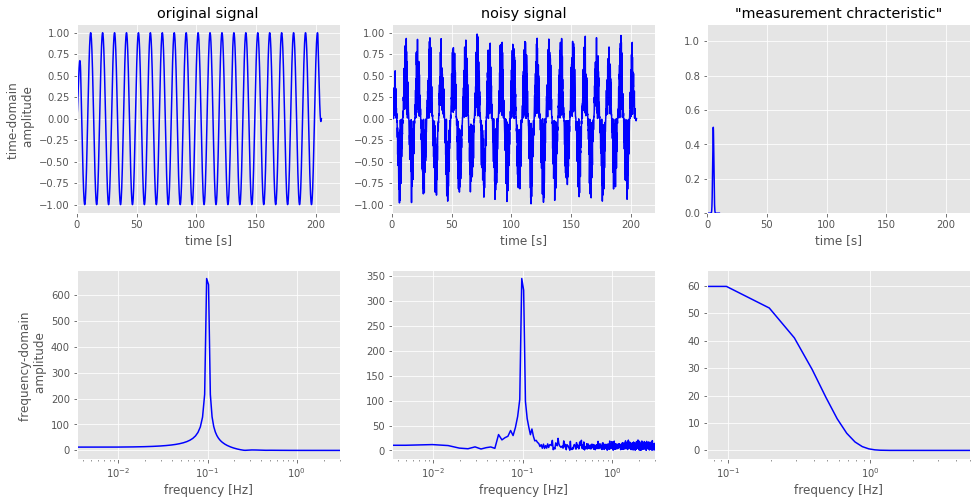

In [8]:
# Cell 6: setting up a noisy signal to be convolved with the "characteristics of a measurement device"

# creating original signal
npts = 2048                             # number of samples, initial value: 2048
dt = 0.1                                # sample rate, initial value:0.1 
t = np.linspace(0, npts*dt, npts)
a_ = np.sin(2*np.pi*dt * t + np.pi/5)

# creating noisy signal
an_ = a_  * np.random.rand(a_.size) 

# need to taper the signal first 
taper_percentage = 0.03  
# choose the type of taper window
taper = np.bartlett(int(npts * taper_percentage))
# fill taper with ones in the middle to fit length of data
taper_left, taper_right = np.array_split(taper, 2)
taper = np.concatenate([taper_left, np.ones(npts-len(taper)), taper_right])
# Taper signals
a = a_ * taper
an = an_ * taper

# creating gauss function as "characterisitc of measurement devise"
npts2 = 1024
dt2=0.01
gauss = 0.5 * signal.gaussian(npts2, std=50)
tg = np.linspace(0, npts2*dt2, npts2)


# plot everything
plt.rcParams["figure.figsize"] = (16, 8)

plt.subplot(231)
plt.plot(t, a, 'b')
plt.title('original signal')
plt.xlim(0, 220)
plt.ylim(-1.1, 1.1)
plt.xlabel('time [s]')
plt.ylabel('time-domain \n amplitude')

plt.subplot(232)
plt.plot(t, an, 'b')
plt.xlim(0, 220)
plt.ylim(-1.1, 1.1)
plt.title('noisy signal')
plt.xlabel('time [s]')

plt.subplot(233)
plt.plot(tg, gauss, 'b')
plt.xlim(0, 220)
plt.ylim(0, 1.1)
plt.title('"measurement chracteristic"')
plt.xlabel('time [s]')

plt.subplot(234)
A = np.fft.rfft(a)
f = np.linspace(0, (1/dt)/2, len(A))
plt.semilogx(f, abs(A), 'b')
plt.xlim(0,3)
plt.xlabel('frequency [Hz]')
plt.ylabel('frequency-domain \n amplitude')

plt.subplot(235)
AN = np.fft.rfft(an)
plt.semilogx(f, abs(AN), 'b')
plt.xlim(0,3)
plt.xlabel('frequency [Hz]')

plt.subplot(236)
GAUSS = np.fft.rfft(gauss)
fg = np.linspace(0, (1/dt2)/2, len(GAUSS))
plt.semilogx(fg, abs(GAUSS), 'b')
plt.xlim(0,5)
plt.xlabel('frequency [Hz]')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

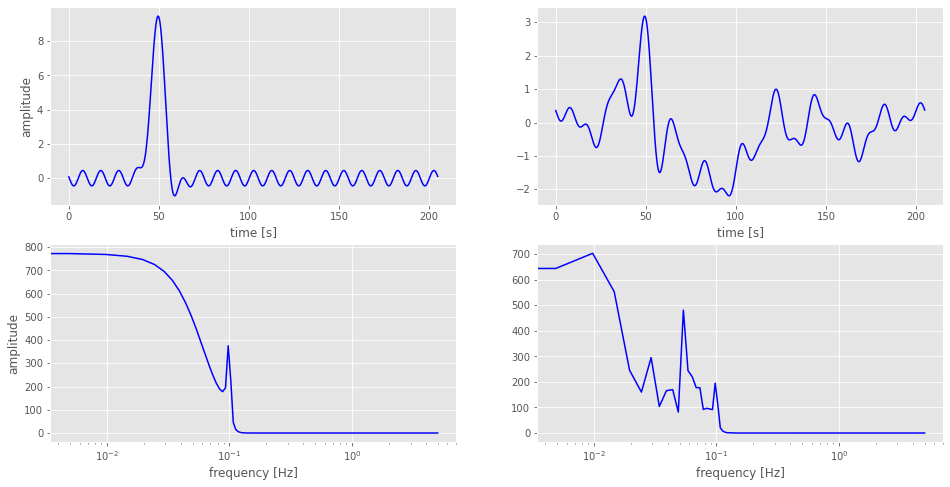

In [9]:
# Cell 7: convolve both signals with "characteristic"
# remember: convolution in the time domain is multiplication in the frequency domain 

# zero padding to ensure that G has the same length than the functions
padding_factor = npts /npts2        
G = np.fft.rfft(gauss, n=int(len(gauss)*padding_factor))

# convolve pure signal
A = np.fft.rfft(a)
Aconv = np.fft.irfft(G * A)

# convolve noisy signal
AN = np.fft.rfft(an)
ANconv = np.fft.irfft(G * AN)

# plot everything
tc = np.linspace(0, len(ANconv)*dt, len(ANconv))
plt.rcParams["figure.figsize"] = (16, 8)

plt.subplot(221)
plt.plot(tc, Aconv, 'b')
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(222)
plt.plot(tc, ANconv, 'b')
plt.xlabel('time [s]')

plt.subplot(223)
AC = np.fft.rfft(Aconv)
fac = np.linspace(0, (1/dt)/2, len(AC))
plt.semilogx(fac, abs(AC), 'b')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')

plt.subplot(224)
ANC = np.fft.rfft(ANconv)
plt.semilogx(fac, abs(ANC), 'b')
plt.xlabel('frequency [Hz]')

plt.show()


For the pure signal, we can still clearly distinguish between the amplitude spectra of the gauss curve and of the sinusoid. For the signal disturbed by noise, this is not the case anymore. Both, in time and frequency domain, the signal looks chaotic. That is because the gauss signal has high amplitudes in the same frequency than the sinus signal.

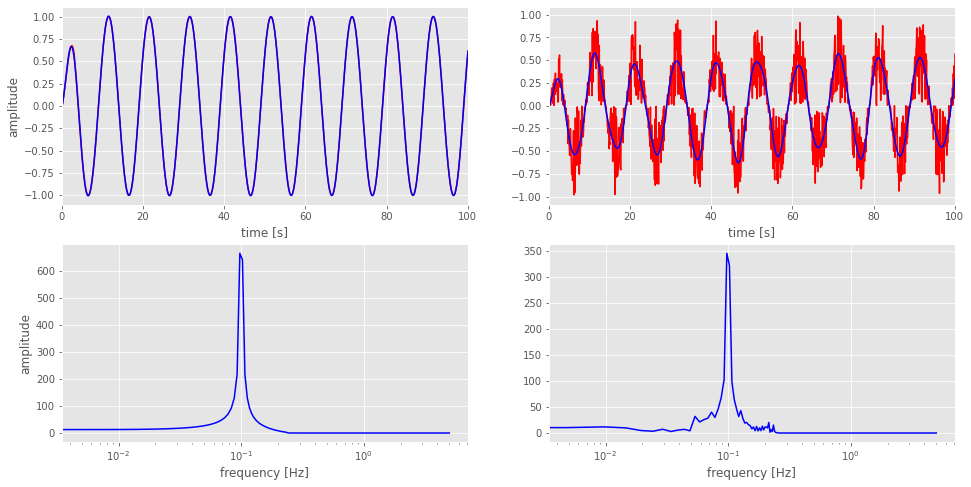

In [10]:
# Cell 8: deconvolution and comparison with original function 

# to not always overwrite G, we copy it and work with the copy
G_ = G.copy()

# because division by zero is not defined, we need to provide a water level aleady now
wl = 1e-10              #the water level should match your signal to noise ratio
for i in range(0, len(G_)):
    if G_[i] < wl:
        G_[i] += wl     #Note, that we +=add the water-level here, which should lead to a constant in the frequency domain
                        #to prevent high amplifications of the data spectrum 
                        #in the deconvolution at high frequencies by filling in the especially low amplitude features
# deconvolve pure signal
Adeconv = np.fft.irfft(AC/ G_)

# deconvolve noisy signal
ANdeconv = np.fft.irfft(ANC/ G_)

# plot everything
tdc = np.linspace(0, len(Adeconv)*dt, len(Adeconv))
plt.rcParams["figure.figsize"] = (16, 8)

plt.subplot(221)
plt.plot(tdc, a, 'r')
plt.plot(tdc, Adeconv, 'b')
plt.xlim(0, 100)
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(222)
plt.plot(tdc, an, 'r')
plt.plot(tdc, ANdeconv, 'b')
plt.xlim(0, 100)
plt.xlabel('time [s]')

plt.subplot(223)
AD = np.fft.rfft(Adeconv)
fac = np.linspace(0, (1/dt)/2, len(AC))
plt.semilogx(fac, abs(AD), 'b')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')

plt.subplot(224)
AND = np.fft.rfft(ANdeconv)
plt.semilogx(fac, abs(AND), 'b')
plt.xlabel('frequency [Hz]')

plt.show()


Deconvolution in the frequency domain is a division. Because our kernel function for deconvolution (G) contains zeros, we have to set a water-level even for the noise free data (division by zero is mathematically not defined).

The starting value for the water-level (1e-20) is, however, so small that we run into numerical issues and even destroy the deconvolution of our noise free data. We have introduced artifical noise at higher frequencies. The deconvolution of the noisy data is completely "exploded".

At water-level values of about 1e-14 we see that the deconvolution for the noise free data is almost perfect, the noisy one is not. 
By increasing the water-level, we also see in the amplitude spectrum the reduction of higher frequencies until (at values of about 1e-10) both deconvolved curves look smooth. However, the deconvolved noisy curve is not as perfect symmetric as the pure signal. Though we got rid of all the noise reverberations, we can never fully reconstruct the real signal, just approximate it. 

<br></br>
<br></br><br></br>